In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [2]:
df=pd.read_csv(r"cleaned_book_data.csv")
print(df.head())
print(df.info())
print(df.duplicated().sum())
print(df.isnull().sum())

                                           Book Name          Author  \
0  Think Like a Monk: The Secret of How to Harnes...      Jay Shetty   
1  Ikigai: The Japanese Secret to a Long and Happ...   Héctor García   
2  The Subtle Art of Not Giving a F*ck: A Counter...     Mark Manson   
3  Atomic Habits: An Easy and Proven Way to Build...     James Clear   
4  Life's Amazing Secrets: How to Find Balance an...  Gaur Gopal Das   

                                         Description  Rating  \
0  Over the past three years, Jay Shetty has beco...     4.9   
1                         Brought to you by Penguin.     4.6   
2  In this generation-defining self-help guide, a...     4.4   
3                         Brought to you by Penguin.     4.6   
4  Stop going through life,  Start growing throug...     4.6   

   Number of Reviews    Price  Rank                             Genre  \
0              342.0  10080.0     1         Society & Culture (Books)   
1             3670.0    615.0     2 

In [3]:
# Text preprocessing (tokenization, stopword removal, lemmatization)
def preprocess_text(text):
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

df['cleaned_description'] = df['Description'].apply(preprocess_text)

In [4]:
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(df['cleaned_description'])

In [8]:
# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(tfidf_matrix)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds

In [9]:
# Dimensionality reduction for visualization (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())

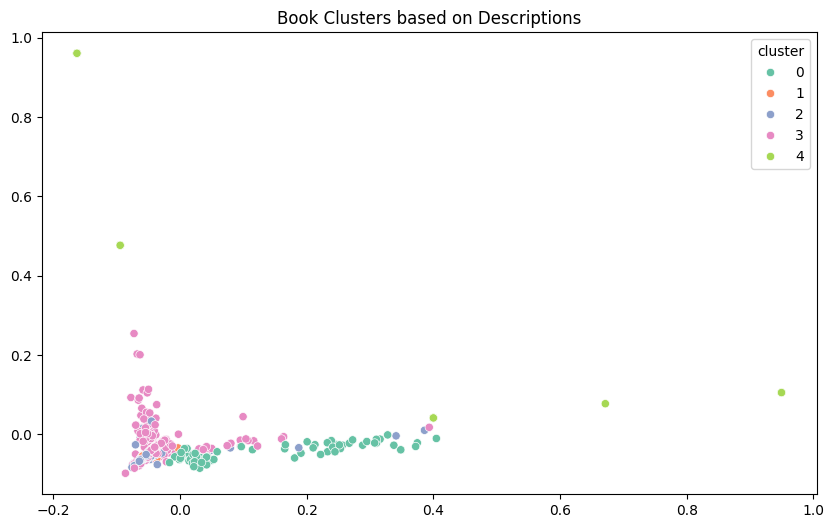

In [10]:
# Visualizing the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['cluster'], palette='Set2')
plt.title('Book Clusters based on Descriptions')
plt.show()